# 1. Import Data

In [1]:
# 导入想换类库
import keras
import pandas as pd
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Import Data
dataset = pd.read_csv("train.csv")
target = dataset.iloc[:,0].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("test.csv").values.reshape(-1,28,28,1)

data_x = train # 训练特征
data_y = target # 训练目标


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42) # 分割数据
print (x_train.shape);

Using TensorFlow backend.


(33600, 784)


# 2. Reshape Data

In [2]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols) # 1 就是通道数， 3 就是RGB， 1 = 黑白的/灰度图
    print (input_shape)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    print (input_shape)

(28, 28, 1)


# 3. transfer the integer into 0~1 decimal numbers

In [3]:
# 0~1 float

x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")
x_train /= 255
x_test  /=255 

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (33600, 28, 28, 1)
33600 train samples
8400 test samples


# 4. shrink the data to fit the model

In [4]:
y_train = keras.utils.to_categorical(y_train,num_classes) # one-hot vector , 因为softmax要用
y_test = keras.utils.to_categorical(y_test,num_classes)

model =Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape)) #32C3
          
model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) #64C3

model.add(MaxPooling2D(pool_size=(2,2))) #MP2
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu')) # Dense前都要接Flatten , 6C5-MP2-16C5-MP2-120C1    (FLATTEN)   -84N-10N

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 5. Train the model

In [5]:
history = model.fit(x_train, y_train, batch_size=200, epochs=12, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 173s - loss: 0.5609 - acc: 0.8267 - val_loss: 0.1692 - val_acc: 0.9489
Epoch 2/12
33600/33600 [==============================] - 196s - loss: 0.1767 - acc: 0.9452 - val_loss: 0.0940 - val_acc: 0.9727
Epoch 3/12
33600/33600 [==============================] - 189s - loss: 0.1178 - acc: 0.9644 - val_loss: 0.0727 - val_acc: 0.9774
Epoch 4/12
33600/33600 [==============================] - 209s - loss: 0.0954 - acc: 0.9720 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 5/12
33600/33600 [==============================] - 198s - loss: 0.0802 - acc: 0.9760 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 6/12
33600/33600 [==============================] - 178s - loss: 0.0722 - acc: 0.9781 - val_loss: 0.0540 - val_acc: 0.9825
Epoch 7/12
33600/33600 [==============================] - 198s - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0460 - val_acc: 0.9860
Epoch 8/12
33600/33600 [========================

# 6. Draw a acc graph 

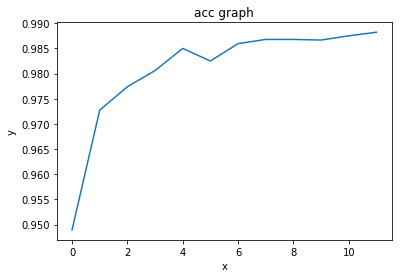

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


plt.xlabel('x')
plt.ylabel('y')
plt.title('acc graph')

plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])

plt.show()

# 7. Predict

In [8]:
import numpy as np
y_pred = model.predict_classes(test)

np.savetxt('CNN_6.csv', np.c_[range(1,len(test)+1),y_pred], delimiter=',', 
           header = 'ImageId,Label', comments = '', fmt='%d')

28000/28000 [==============================] - 55s    
